<a href="https://colab.research.google.com/github/michaelknorr/CHE4061/blob/main/CHE4076_LYS_pH_7_1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the Excel file with the sheet name 'Sphere1'
df = pd.read_excel('/content/drive/My Drive/Conc Profile LYS pH 7.1.xls', sheet_name='Sphere1', header=None, usecols="C:S", skiprows=3, nrows=736) # Change '/content/drive/My Drive/Conc Profile LYS pH 7.1.xls' to file path in Google Drive of user
df1=pd.read_excel('/content/drive/My Drive/Conc Profile LYS pH 7.1.xls', sheet_name='Sphere1', header=None, usecols="Y:AO", skiprows=100, nrows=1)
df2 = pd.read_excel('/content/drive/My Drive/Conc Profile LYS pH 7.1.xls', sheet_name='Sphere1', header=None, skiprows=66, usecols="X", nrows=21)
raw_data_array = df.to_numpy()
radial_positions = df1.to_numpy().flatten()  # Flattening the array to make it 1D
time_steps = df2.to_numpy().flatten()  # Rows 102 to 121 (index 101 to 120), column X (index 23)

#print(radial_positions.shape) #Should be 17
#print(time_steps.shape) #Should be 21

**Part A: Average Concentration vs Radial Position or Time**
1. Characteristic Radial Positions over all times
2. Characteristic Time Steps for all Radial Positions
3. All Radial Positions over all Times
4. All Time Steps over all Radial Positions

Average raw data array shape: (23, 17)
Trimmed average raw data array shape: (21, 12)


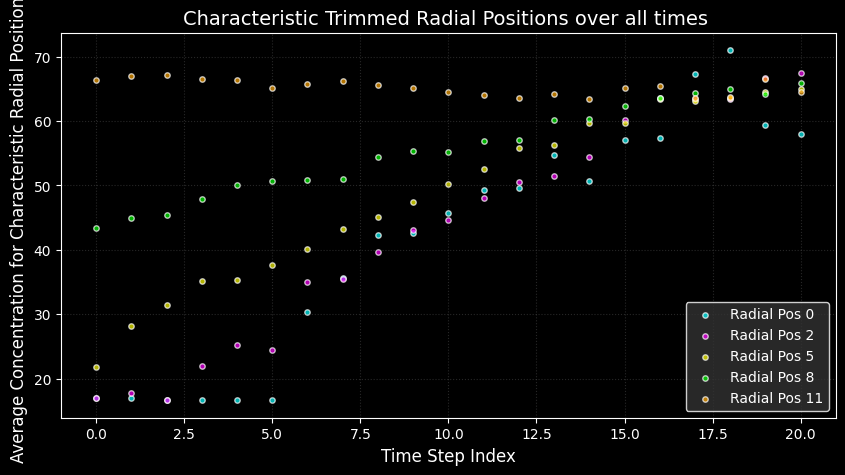

In [ ]:
#A1. Characteristic Trimmed Radial Positions over all times
import numpy as np

radial_angles_per_timestep = 32
num_time_steps = raw_data_array.shape[0] // radial_angles_per_timestep

average_raw_data_array = np.zeros((num_time_steps, raw_data_array.shape[1]))
for col in range(raw_data_array.shape[1]):
    for t in range(num_time_steps):
        radial_angles = raw_data_array[t * radial_angles_per_timestep:(t + 1) * radial_angles_per_timestep, col]
        average_raw_data_array[t, col] = np.mean(radial_angles) #Average over all 32 values for a certain timestep

print(f"Average raw data array shape: {average_raw_data_array.shape}") #Time in rows, Radial position is column

#Trimming
average_raw_data_array_trimmed = average_raw_data_array[:-2, :12] #Cut out last two time steps (rows 22-23) and every radial position after 14 (columns 13-18)
print(f"Trimmed average raw data array shape: {average_raw_data_array_trimmed.shape}")
average_raw_data_trimmed_time=average_raw_data_array[:-2, :]
#Plotting
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.figure(figsize=(10, 5))

num_radial_positions = average_raw_data_array_trimmed.shape[1]
selected_positions = np.linspace(0, num_radial_positions - 1, 5, dtype=int)  # Pick 5 evenly spaced radial positions
colors = ['cyan', 'magenta', 'yellow', 'lime', 'orange']

for idx, color in zip(selected_positions, colors):
    plt.scatter(range(average_raw_data_array_trimmed.shape[0]), # X-axis: Time Step Index
                average_raw_data_array_trimmed[:, idx], # Y-axis: concentration
                label=f"Radial Pos {idx}",
                s=15,
                color=color,
                edgecolors="white",
                alpha=0.7)

# Labels, title, and grid styling
plt.xlabel("Time Step Index", fontsize=12, color="white")
plt.ylabel("Average Concentration for Characteristic Radial Positions", fontsize=12, color="white")
plt.title("Characteristic Trimmed Radial Positions over all times ", fontsize=14, color="white")


plt.legend(frameon=True, facecolor="#333333", edgecolor="white", fontsize=10) # legend
plt.grid(color="gray", linestyle="dotted", alpha=0.3)
plt.show()


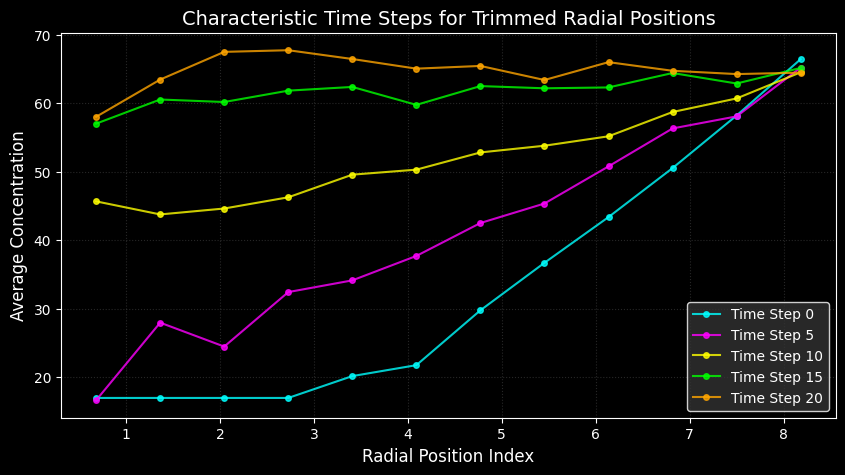

In [ ]:
#A2. Characteristic Time Steps for Trimmed Radial Positions
plt.style.use("dark_background")
plt.figure(figsize=(10, 5))

num_time_steps = average_raw_data_array_trimmed.shape[0]
selected_time_steps = np.linspace(0, num_time_steps - 1, 5, dtype=int)  # Pick 5 evenly spaced time steps
colors = ['cyan', 'magenta', 'yellow', 'lime', 'orange']

for idx, color in zip(selected_time_steps, colors):
    plt.plot(radial_positions[:average_raw_data_array_trimmed.shape[1]],  # X-axis: radial positions
             average_raw_data_array_trimmed[idx, :],  # Y-axis: concentration
             label=f"Time Step {idx}",
             marker='o',
             linestyle='-',
             markersize=4,
             color=color,
             alpha=0.8)

# Labels, title, and grid styling
plt.xlabel("Radial Position Index", fontsize=12, color="white")
plt.ylabel("Average Concentration", fontsize=12, color="white")
plt.title("Characteristic Time Steps for Trimmed Radial Positions", fontsize=14, color="white")
plt.legend(frameon=True, facecolor="#333333", edgecolor="white", fontsize=10) #legend
plt.grid(color="gray", linestyle="dotted", alpha=0.3)
plt.show()


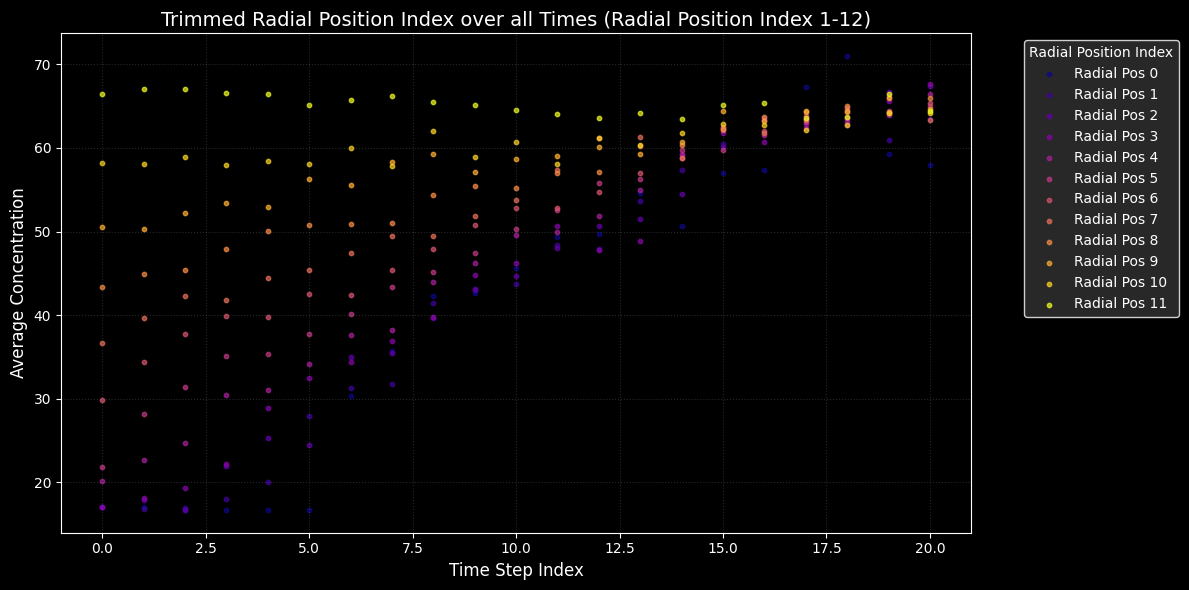

In [ ]:
#A3. Trimmed Radial Positions over all Times
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

num_time_steps, num_radial_positions = average_raw_data_array_trimmed.shape
colors = plt.cm.plasma(np.linspace(0, 1, num_radial_positions))
for idx in range(num_radial_positions):
    plt.scatter(range(num_time_steps),
                average_raw_data_array_trimmed[:, idx],
                s=10,
                color=colors[idx],
                alpha=0.7,
                label=f"Radial Pos {idx}")

# Labels, title, and grid styling
plt.xlabel("Time Step Index", fontsize=12, color="white")
plt.ylabel("Average Concentration", fontsize=12, color="white")
plt.title("Trimmed Radial Position Index over all Times (Radial Position Index 1-12)", fontsize=14, color="white")
plt.grid(color="gray", linestyle="dotted", alpha=0.3)
plt.legend(title="Radial Position Index", fontsize=10, loc="upper left", bbox_to_anchor=(1.05, 1), frameon=True, facecolor="#333333", edgecolor="white") #legend
plt.tight_layout()
plt.show()


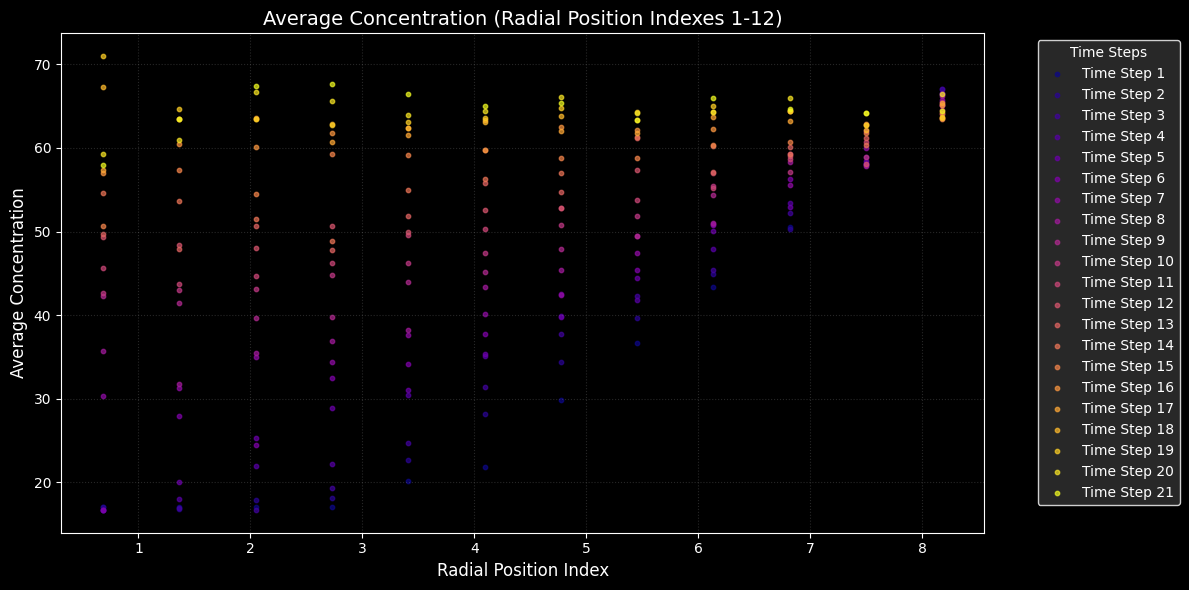

In [ ]:
#A4. All Time Steps over Trimmed Radial Positions
plt.style.use("dark_background")

# Create the plot
plt.figure(figsize=(12, 6))

# Get the number of time steps and radial positions
num_time_steps, num_radial_positions = average_raw_data_array_trimmed.shape

# Generate a colormap for distinct time steps
colors = plt.cm.plasma(np.linspace(0, 1, num_time_steps))  # 'plasma' works well on dark backgrounds

# Plot each time step's data
for idx in range(num_time_steps):
    plt.scatter(radial_positions[:num_radial_positions],  # X-axis: radial positions
                average_raw_data_array_trimmed[idx, :],  # Y-axis: concentration
                s=10,  # Small points for clarity
                color=colors[idx],
                alpha=0.7,
                label=f"Time Step {idx+1}")  # Add a label for the legend

# Labels, title, and grid styling
plt.xlabel("Radial Position Index", fontsize=12, color="white")
plt.ylabel("Average Concentration", fontsize=12, color="white")
plt.title("Average Concentration (Radial Position Indexes 1-12)", fontsize=14, color="white")

# Customize the grid
plt.grid(color="gray", linestyle="dotted", alpha=0.3)

# Add the legend (key) outside the plot area
plt.legend(title="Time Steps", fontsize=10, loc="upper left", bbox_to_anchor=(1.05, 1), frameon=True, facecolor="#333333", edgecolor="white")

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the scatter plot
plt.show()


**Part B: Normalization of Trimmed Data**
1. Data Normalization
2. Plot of Concentration for Trimmed Radial Positions over all Time Steps
3. Plot of Concentration for all Time Steps over Trimmed Radial Positions

In [ ]:
#B1 Data Normalization

global_min =np.min(average_raw_data_trimmed_time)  # Minimum Concentration Value in the trimmed array (radial positions 0-12), less than 8um of radial position
global_max =np.max(average_raw_data_trimmed_time[:, 1:-1]) # Maximum Concentration value in the trimmed array (radial positions 0-12), less than 8um of radial position
normalized_data_global = (average_raw_data_trimmed_time[:, 0:12] - global_min) / (global_max - global_min) #Normalization
print(f"Normalized data (global) shape: {normalized_data_global.shape}")



Normalized data (global) shape: (21, 12)


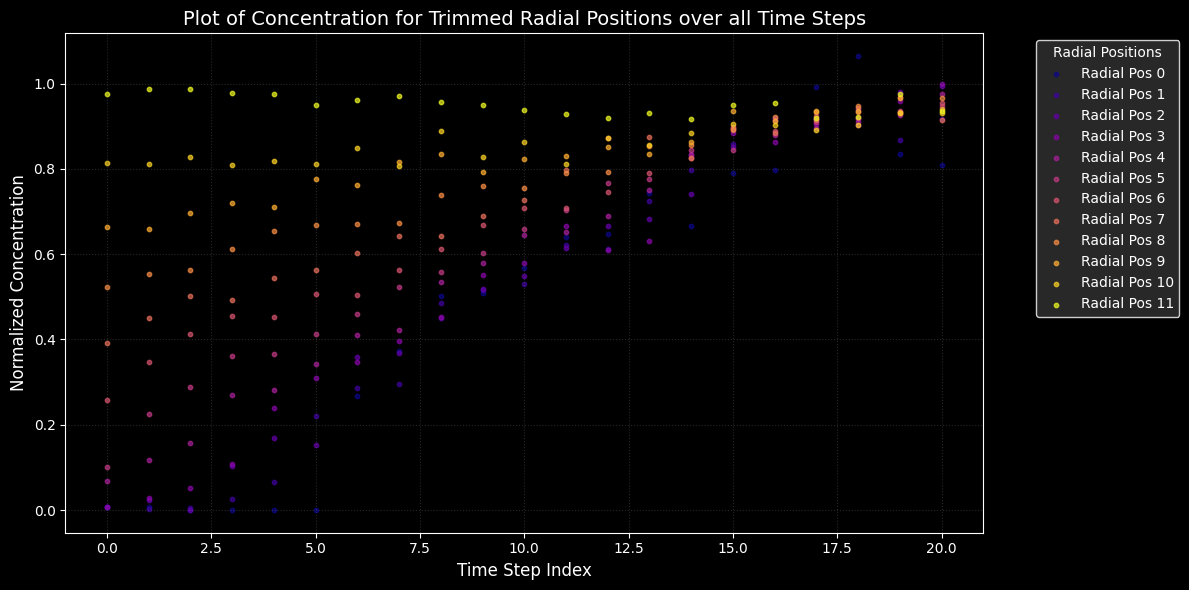

In [ ]:
#B2. Plot of Concentration for Trimmed Radial Positions over all Time Steps

plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

num_time_steps, num_radial_positions = normalized_data_global.shape
colors = plt.cm.plasma(np.linspace(0, 1, num_radial_positions))


for idx in range(num_radial_positions):
    plt.scatter(range(num_time_steps),
                normalized_data_global[:, idx],
                s=10,
                color=colors[idx],
                alpha=0.7,
                label=f"Radial Pos {idx}")

# Labels, title, and grid styling
plt.xlabel("Time Step Index", fontsize=12, color="white")
plt.ylabel("Normalized Concentration", fontsize=12, color="white")
plt.title("Plot of Concentration for Trimmed Radial Positions over all Time Steps", fontsize=14, color="white")
plt.grid(color="gray", linestyle="dotted", alpha=0.3)
plt.legend(title="Radial Positions", fontsize=10, loc="upper left", bbox_to_anchor=(1.05, 1), frameon=True, facecolor="#333333", edgecolor="white")
plt.tight_layout()
plt.show()


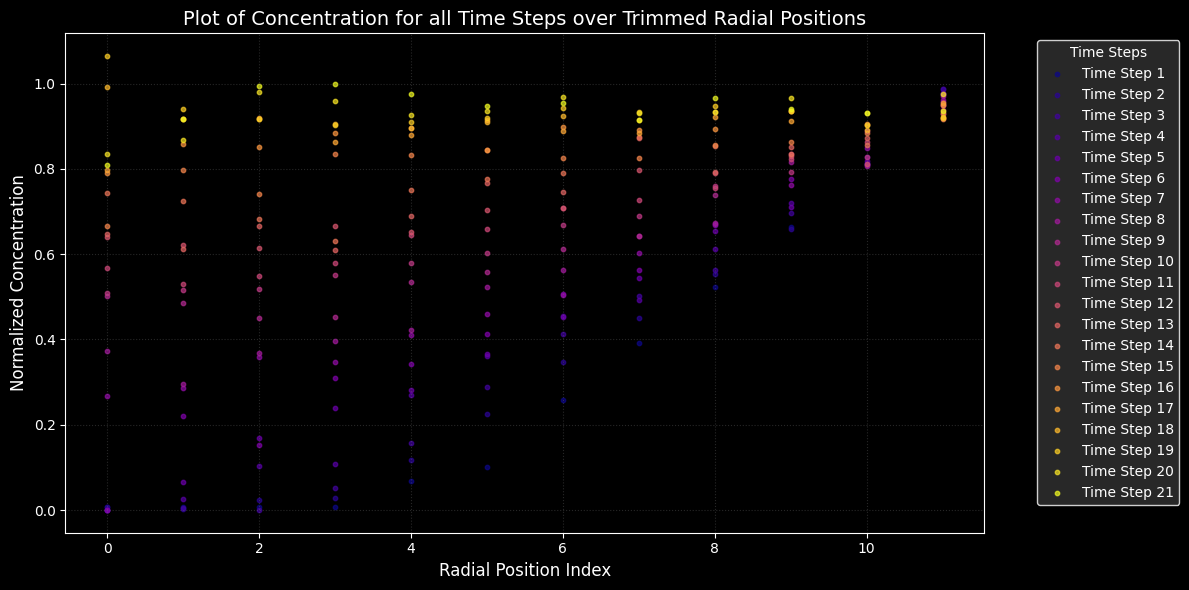

In [ ]:
#B3. Plot of Concentration for all Time Steps over Trimmed Radial Positions
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

num_time_steps, num_radial_positions = normalized_data_global.shape
colors = plt.cm.plasma(np.linspace(0, 1, num_time_steps))

# Plot each time step's data across radial positions
for idx in range(num_time_steps):
    plt.scatter(range(num_radial_positions),  # X-axis: radial positions
                normalized_data_global[idx, :],  # Y-axis: concentration
                s=10,
                color=colors[idx],
                alpha=0.7,
                label=f"Time Step {idx+1}")

# Labels, title, and grid styling
plt.xlabel("Radial Position Index", fontsize=12, color="white")
plt.ylabel("Normalized Concentration", fontsize=12, color="white")
plt.title("Plot of Concentration for all Time Steps over Trimmed Radial Positions", fontsize=14, color="white")
plt.grid(color="gray", linestyle="dotted", alpha=0.3)

# Add a legend outside the plot area
plt.legend(title="Time Steps", fontsize=10, loc="upper left", bbox_to_anchor=(1.05, 1), frameon=True, facecolor="#333333", edgecolor="white")

plt.tight_layout()
plt.show()



**Part C: Regression**
1. Time-Step Specific Regression Parameters Function
2. Time-Step Specific Regression Parameters Plot
3. Global Regression Parameters Function
4. Global Regression Parameters Plot
5. Global Regression Parameters Plot (Characteristic Time Steps)
6. Parity Plot for Specified Time Step (in C3)
7. Parity Plot for All Time Steps

In [ ]:
#C1. Time-Step Specific Regression Parameters Function
from scipy.optimize import curve_fit

# Define the diffusion model function
def diffusion_model(r, t, t_0, D_e, C_0):
    rs = 0.00075  # cm
    sum_terms = 0

    for term in range(1, 6):
        exp_term = np.exp(
            -D_e * term**2 * np.pi**2 * (t + t_0) / rs**2
        )
        sum_terms += (((-1) ** term) / term) * np.sin(term * np.pi * r * 10**-4 / rs) * exp_term

    return (1 + (2 * rs / (np.pi * r * 10**-4)) * sum_terms) * C_0

# Fit the diffusion model
def fit_diffusion_model(radial_positions, time_steps, normalized_data_global):
    def model_func(r, t_0, D_e, C_0):
        return diffusion_model(r, t, t_0, D_e, C_0)

    initial_guess = [192.97502, 1.3e-10, 0.9184378]
    bounds = ([0, 0, 0], [500, 1e-5, 10])

    params_list = []
    for time_idx, t in enumerate(time_steps):
        r_values = radial_positions[:12]
        data_values = normalized_data_global[time_idx, :]

        # Perform curve fitting with bounds
        params_opt, params_cov = curve_fit(
                model_func, r_values, data_values, p0=initial_guess, bounds=bounds
            )

        params_list.append(params_opt)

    return np.array(params_list)

params = fit_diffusion_model(radial_positions, time_steps, normalized_data_global) # Perform fit to parameters
print("Regression Parameters (t_0, D_e, C_0) for each time step:\n", params)




Regression Parameters (t_0, D_e, C_0) for each time step:
 [[1.48785343e+02 1.00381493e-10 8.30041065e-01]
 [1.53050198e+02 9.78134387e-11 8.37372373e-01]
 [2.08085698e+02 1.04820876e-10 8.56547707e-01]
 [1.55868041e+02 9.68781196e-11 8.49657396e-01]
 [1.57225960e+02 1.00099817e-10 8.51781378e-01]
 [1.64499155e+02 1.05026412e-10 8.57046869e-01]
 [1.92974931e+02 1.30485394e-10 9.15414538e-01]
 [1.92975020e+02 1.30000000e-10 9.18437800e-01]
 [1.92975020e+02 1.30000000e-10 9.18437800e-01]
 [1.92975020e+02 1.30000000e-10 9.18437800e-01]
 [1.92975020e+02 1.30000000e-10 9.18437800e-01]
 [1.92975020e+02 1.30000000e-10 9.18437800e-01]
 [1.92975020e+02 1.30000000e-10 9.18437800e-01]
 [1.92975020e+02 1.30000000e-10 9.18437800e-01]
 [1.92975020e+02 1.30000000e-10 9.18437800e-01]
 [1.93219771e+02 7.38184027e-09 8.83047402e-01]
 [1.93265113e+02 9.44169996e-09 8.96239509e-01]
 [1.93482113e+02 1.70458867e-08 9.21172254e-01]
 [1.93594152e+02 2.06737114e-08 9.36409790e-01]
 [1.93124210e+02 4.69841691e-

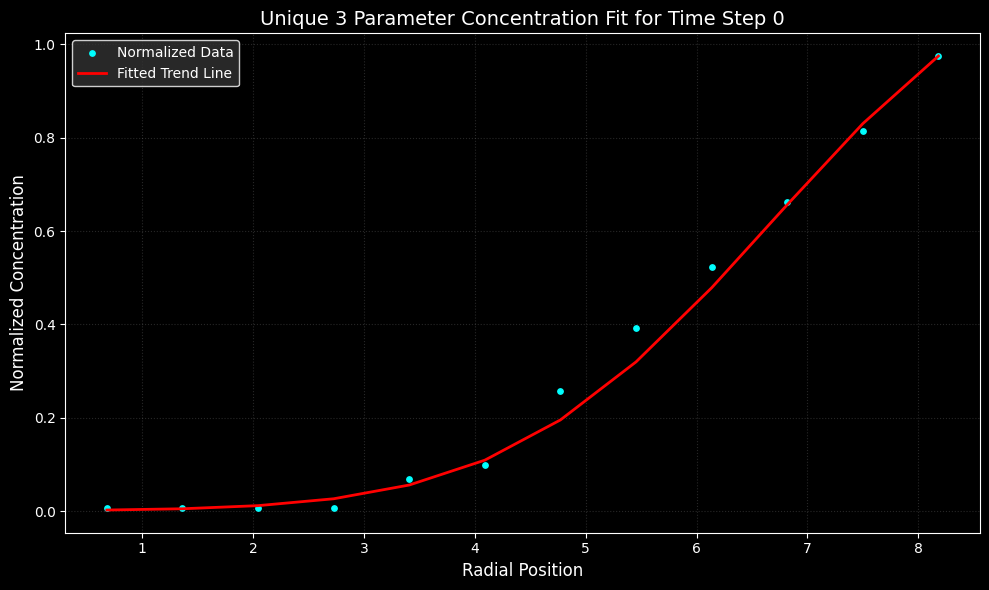

In [ ]:
#C2. Time-Step Specific Regression Parameters Plot
time_step_idx = 0  #SPECIFIES TIME STEP BEING PLOTTED

r_values = radial_positions[:12]
t = time_steps[time_step_idx]
params_opt = params[time_step_idx]
t_0, D_e, C_0 = params_opt

trend_line = diffusion_model(r_values, t, t_0, D_e, C_0) # Calculate the fitted values (trend line) using the diffusion model

# Plot the normalized data and the fitted trend line
plt.figure(figsize=(10, 6))
plt.scatter(r_values, normalized_data_global[time_step_idx, :], color='cyan', label='Normalized Data', s=15)# Plot the normalized data for the chosen time step
plt.plot(r_values, trend_line, color='red', label='Fitted Trend Line', linewidth=2)# Plot the fitted trend line

# Labels, title, and grid styling
plt.xlabel("Radial Position", fontsize=12, color="white")
plt.ylabel("Normalized Concentration", fontsize=12, color="white")
plt.title(f"Unique 3 Parameter Concentration Fit for Time Step {time_step_idx}", fontsize=14, color="white")
plt.grid(color="gray", linestyle="dotted", alpha=0.3)
plt.legend(frameon=True, facecolor="#333333", edgecolor="white", fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
#C3. Global Regression Parameters Function
# Define the diffusion model function
def diffusion_model(r, t, t_0, D_e, C_0):
    rs = 0.00075  # cm
    sum_terms = 0

    for term in range(1, 6):
        exp_term = np.exp(
            np.clip(-D_e * term**2 * np.pi**2 * (t + t_0) / rs**2, -50, 50)
        )
        sum_terms += (((-1) ** term) / term) * np.sin(term * np.pi * r * 10**-4 / rs) * exp_term

    r_safe = np.where(r == 0, 1e-10, r)

    return (1 + (2 * rs / (np.pi * r_safe * 10**-4)) * sum_terms) * C_0

# Fit the global diffusion model
def fit_global_diffusion_model(radial_positions, time_steps, normalized_data_global):
    # Reshape the data for global fitting
    R, T = np.meshgrid(radial_positions, time_steps)
    r_values = R.ravel()
    t_values = T.ravel()
    data_values = normalized_data_global.ravel()

    # Define a wrapper for curve fitting
    def model_func(rt, t_0, D_e, C_0):
        r, t = rt
        return diffusion_model(r, t, t_0, D_e, C_0)

    initial_guess = [192.97502, 1.3e-10, 0.9184378]
    bounds = ([0, 0, 0], [500, 1e-9, 10])

    # Perform global curve fitting
    params_opt, params_cov = curve_fit(
        model_func, (r_values, t_values), data_values, p0=initial_guess, bounds=bounds
        )

    return np.array(params_opt)

# Perform fit to obtain global parameters
global_params = fit_global_diffusion_model(radial_positions[:12], time_steps, normalized_data_global)
print(global_params)  # Single t_0, D_e, C_0



[1.9297502e+02 1.3000000e-10 9.1843780e-01]


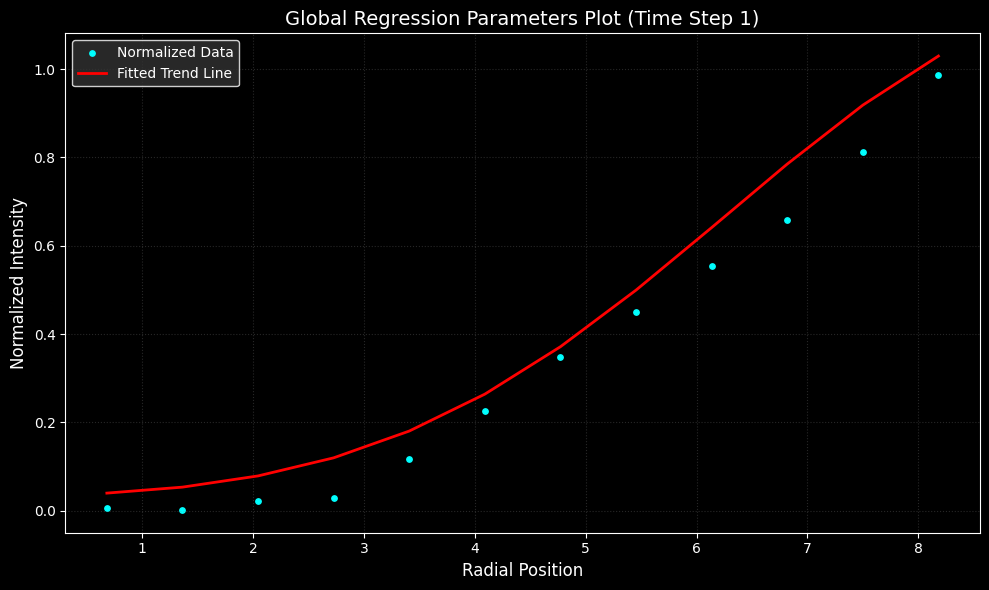

In [ ]:
#C4. Global Regression Parameters Plot
initial_guess = [192.97502, 1.3e-10, 0.9184378]

# Select a specific time step for plotting (e.g., time step 0)
time_step_idx = 1  # Choose the index of the time step you'd like to visualize

# Extract the radial positions and normalized data for the chosen time step
r_values = radial_positions[:12] #Calls only the first eight radial positions (9 elements)
data_values = normalized_data_global[time_step_idx, :]

# Calculate the fitted values (trend line) using the global parameters
fitted_values = diffusion_model(r_values, time_steps[time_step_idx-1], *global_params)

# Plot the normalized data as scatter points
plt.figure(figsize=(10, 6))
plt.scatter(r_values, data_values, color='cyan', label='Normalized Data', s=15)

# Plot the fitted trend line
plt.plot(r_values, fitted_values, color='red', label='Fitted Trend Line', linewidth=2)

# Labels, title, and grid styling
plt.xlabel("Radial Position", fontsize=12, color="white")
plt.ylabel("Normalized Intensity", fontsize=12, color="white")
plt.title(f"Global Regression Parameters Plot (Time Step {time_step_idx})", fontsize=14, color="white")
plt.grid(color="gray", linestyle="dotted", alpha=0.3)
plt.legend(frameon=True, facecolor="#333333", edgecolor="white", fontsize=10)
plt.tight_layout()
plt.show()

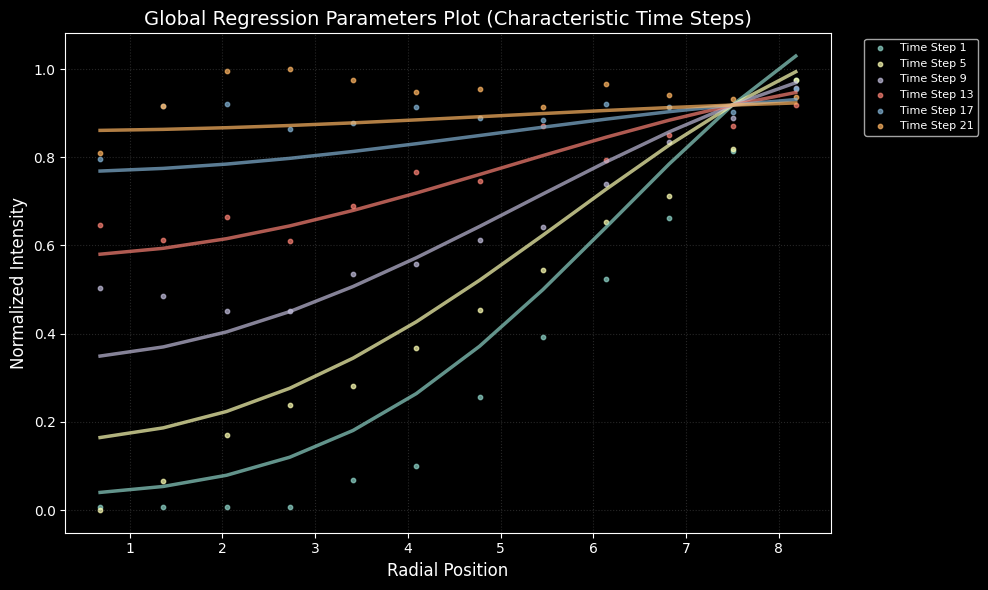

In [ ]:
#C5 Global Regression Parameters Plot (Characteristic Time Steps)
plt.figure(figsize=(10, 6))

# Loop through all time steps
for time_step_idx in range(len(time_steps)):
    r_values = radial_positions[:12]  # Calls only the first 12 radial positions
    data_values = normalized_data_global[time_step_idx, :]
    fitted_values = diffusion_model(r_values, time_steps[time_step_idx], *global_params) #Perform Regression

    # Plotting Loop
    if time_step_idx % 4==0:
      plt.scatter(r_values, data_values, label=f'Time Step {time_step_idx+1}', s=10, alpha=0.7) #Actual Data
      plt.plot(r_values, fitted_values, linewidth=2.5, alpha=0.7) #Regressed Lines

# Labels, title, and grid styling
plt.xlabel("Radial Position", fontsize=12)
plt.ylabel("Normalized Intensity", fontsize=12)
plt.title("Global Regression Parameters Plot (Characteristic Time Steps)", fontsize=14)
plt.grid(color="gray", linestyle="dotted", alpha=0.3)
plt.legend(fontsize=8, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


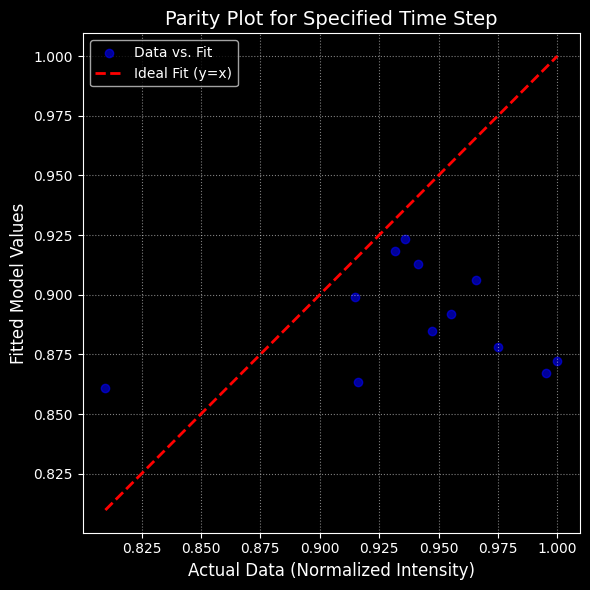

In [ ]:
#C6. Parity Plot for Specified Time Step (in C4)

plt.figure(figsize=(6, 6))
plt.scatter(data_values, fitted_values, color='blue', alpha=0.6, label="Data vs. Fit")
min_val = min(np.min(data_values), np.min(fitted_values))
max_val = max(np.max(data_values), np.max(fitted_values))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="dashed", linewidth=2, label="Ideal Fit (y=x)")

# Labels, title, and legend
plt.xlabel("Actual Data (Normalized Intensity)", fontsize=12)
plt.ylabel("Fitted Model Values", fontsize=12)
plt.title("Parity Plot for Specified Time Step", fontsize=14)
plt.legend()
plt.grid(True, linestyle="dotted", alpha=0.5)
plt.tight_layout()
plt.show()


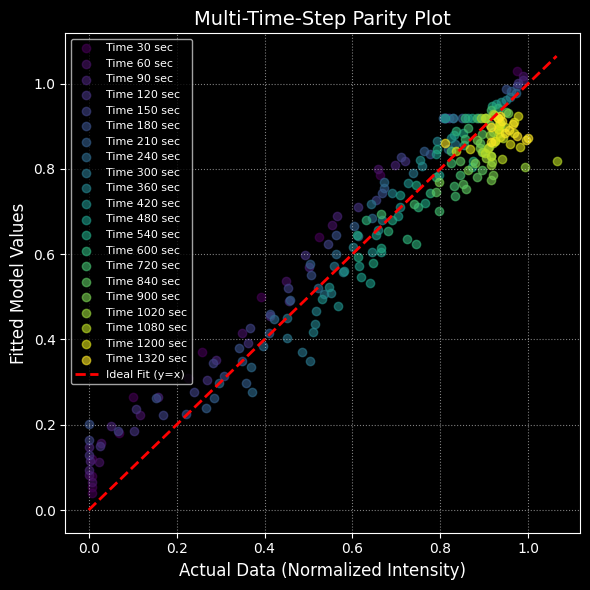

In [ ]:
#C7. Parity Plot for All Time Steps
plt.figure(figsize=(6, 6))

# Loop through each time step to generate parity data
colors = plt.cm.viridis(np.linspace(0, 1, len(time_steps)))
for i, t in enumerate(time_steps):
    actual_values = normalized_data_global[i, :]  # Experimental data at time step i
    fitted_values = diffusion_model(r_values, t, *global_params)  # Model predictions
    plt.scatter(actual_values, fitted_values, color=colors[i], alpha=0.6, label=f"Time {t} sec")

# Add a y=x reference line (ideal fit)
min_val = min(normalized_data_global.ravel().min(), fitted_values.min())
max_val = max(normalized_data_global.ravel().max(), fitted_values.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="dashed", linewidth=2, label="Ideal Fit (y=x)")

# Labels, title, and legend
plt.xlabel("Actual Data (Normalized Intensity)", fontsize=12)
plt.ylabel("Fitted Model Values", fontsize=12)
plt.title("Multi-Time-Step Parity Plot", fontsize=14)
plt.legend(loc="best", fontsize=8, frameon=True)
plt.grid(True, linestyle="dotted", alpha=0.5)
plt.tight_layout()
plt.show()
